In [1]:
import numpy as np
import pandas as pd
import seaborn as sns
import plotly.express as px
import plotly.graph_objects as go

In [2]:
data=pd.read_csv('AB_NYC_2019.csv')

In [3]:
data.head()

,id,name,host_id,host_name,neighbourhood_group,neighbourhood,latitude,longitude,room_type,price,minimum_nights,number_of_reviews,last_review,reviews_per_month,calculated_host_listings_count,availability_365
0,2539,Clean & quiet apt home by the park,2787,John,Brooklyn,Kensington,40.64749,-73.97237,Private room,149,1,9,2018-10-19,0.21,6,365
1,2595,Skylit Midtown Castle,2845,Jennifer,Manhattan,Midtown,40.75362,-73.98377,Entire home/apt,225,1,45,2019-05-21,0.38,2,355
2,3647,THE VILLAGE OF HARLEM....NEW YORK !,4632,Elisabeth,Manhattan,Harlem,40.80902,-73.94190,Private room,150,3,0,NaN,NaN,1,365
3,3831,Cozy Entire Floor of Brownstone,4869,LisaRoxanne,Brooklyn,Clinton Hill,40.68514,-73.95976,Entire home/apt,89,1,270,2019-07-05,4.64,1,194
4,5022,Entire Apt: Spacious Studio/Loft by central park,7192,Laura,Manhattan,East Harlem,40.79851,-73.94399,Entire home/apt,80,10,9,2018-11-19,0.10,1,0


In [4]:
print(data.columns)

Index(['id', 'name', 'host_id', 'host_name', 'neighbourhood_group',
       'neighbourhood', 'latitude', 'longitude', 'room_type', 'price',
       'minimum_nights', 'number_of_reviews', 'last_review',
       'reviews_per_month', 'calculated_host_listings_count',
       'availability_365'],
      dtype='object')


In [5]:
data.describe()

,id,host_id,latitude,longitude,price,minimum_nights,number_of_reviews,reviews_per_month,calculated_host_listings_count,availability_365
count,4.889500e+04,4.889500e+04,48895.000000,48895.000000,48895.000000,48895.000000,48895.000000,38843.000000,48895.000000,48895.000000
mean,1.901714e+07,6.762001e+07,40.728949,-73.952170,152.720687,7.029962,23.274466,1.373221,7.143982,112.781327
std,1.098311e+07,7.861097e+07,0.054530,0.046157,240.154170,20.510550,44.550582,1.680442,32.952519,131.622289
min,2.539000e+03,2.438000e+03,40.499790,-74.244420,0.000000,1.000000,0.000000,0.010000,1.000000,0.000000
25%,9.471945e+06,7.822033e+06,40.690100,-73.983070,69.000000,1.000000,1.000000,0.190000,1.000000,0.000000
50%,1.967728e+07,3.079382e+07,40.723070,-73.955680,106.000000,3.000000,5.000000,0.720000,1.000000,45.000000
75%,2.915218e+07,1.074344e+08,40.763115,-73.936275,175.000000,5.000000,24.000000,2.020000,2.000000,227.000000
max,3.648724e+07,2.743213e+08,40.913060,-73.712990,10000.000000,1250.000000,629.000000,58.500000,327.000000,365.000000


In [10]:
data.isnull().sum()

id                                0
name                              0
host_id                           0
neighbourhood_group               0
neighbourhood                     0
latitude                          0
longitude                         0
room_type                         0
price                             0
minimum_nights                    0
number_of_reviews                 0
calculated_host_listings_count    0
availability_365                  0
dtype: int64

In [7]:
data.drop(['host_name','last_review','reviews_per_month'], axis=1, inplace=True)


In [9]:

data['name'].fillna("NOT AVA", inplace=True)

In [11]:
data.describe()

,id,host_id,latitude,longitude,price,minimum_nights,number_of_reviews,calculated_host_listings_count,availability_365
count,4.889500e+04,4.889500e+04,48895.000000,48895.000000,48895.000000,48895.000000,48895.000000,48895.000000,48895.000000
mean,1.901714e+07,6.762001e+07,40.728949,-73.952170,152.720687,7.029962,23.274466,7.143982,112.781327
std,1.098311e+07,7.861097e+07,0.054530,0.046157,240.154170,20.510550,44.550582,32.952519,131.622289
min,2.539000e+03,2.438000e+03,40.499790,-74.244420,0.000000,1.000000,0.000000,1.000000,0.000000
25%,9.471945e+06,7.822033e+06,40.690100,-73.983070,69.000000,1.000000,1.000000,1.000000,0.000000
50%,1.967728e+07,3.079382e+07,40.723070,-73.955680,106.000000,3.000000,5.000000,1.000000,45.000000
75%,2.915218e+07,1.074344e+08,40.763115,-73.936275,175.000000,5.000000,24.000000,2.000000,227.000000
max,3.648724e+07,2.743213e+08,40.913060,-73.712990,10000.000000,1250.000000,629.000000,327.000000,365.000000


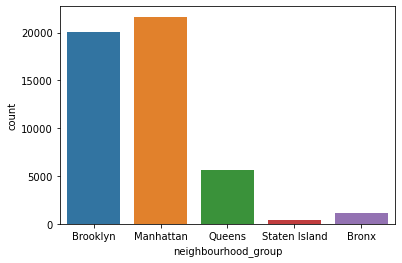

In [12]:
ax = sns.countplot(x="neighbourhood_group", data=data)

In [13]:
data['neighbourhood_group'].value_counts().reset_index()

,index,neighbourhood_group
0,Manhattan,21661
1,Brooklyn,20104
2,Queens,5666
3,Bronx,1091
4,Staten Island,373


In [28]:
data['neighbourhood'].value_counts().reset_index()

,index,neighbourhood
0,Williamsburg,3920
1,Bedford-Stuyvesant,3714
2,Harlem,2658
3,Bushwick,2465
4,Upper West Side,1971
...,...,...
216,Willowbrook,1
217,Woodrow,1
218,Rossville,1
219,Richmondtown,1


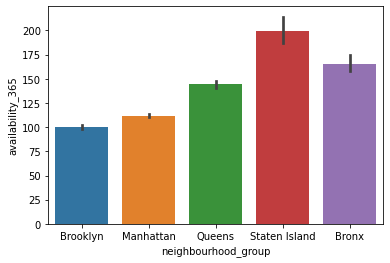

In [29]:
ax = sns.barplot(x="neighbourhood_group", y="availability_365", data=data)

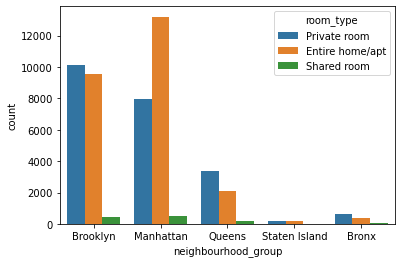

In [37]:
ax= sns.countplot(x = 'neighbourhood_group', 
            hue = 'room_type',
            data = data
           )
            

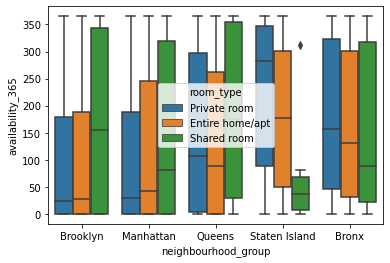

In [39]:
ax= sns.boxplot(x = 'neighbourhood_group',
                   y="availability_365",
            hue = 'room_type',
            data = data
           )

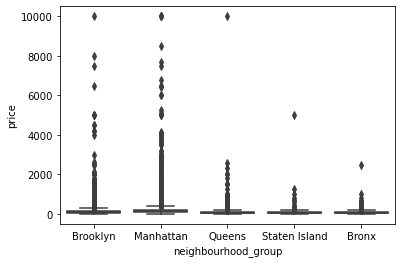

In [43]:
ax= sns.boxplot(x = 'neighbourhood_group',
                   y="price",
            #hue = 'room_type',
            data = data
           )

In [45]:
fig = px.scatter(data, x='longitude', y='latitude',
                 color='neighbourhood_group')
fig.show()

In [11]:
import plotly.express as px
fig = px.sunburst(data, path=['room_type'], values='id' )
plotly.offline.plot(fig, filename='file.html',auto_open=True)

AttributeError: type object 'object' has no attribute 'dtype'

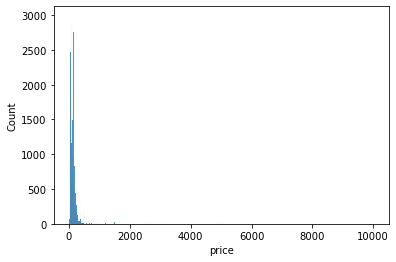

In [14]:
sns.histplot(data=data, x="price")

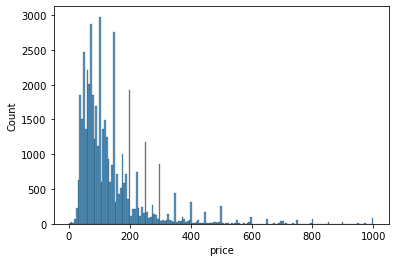

In [16]:
sns.histplot(data=data[data['price']<=1000], x="price")

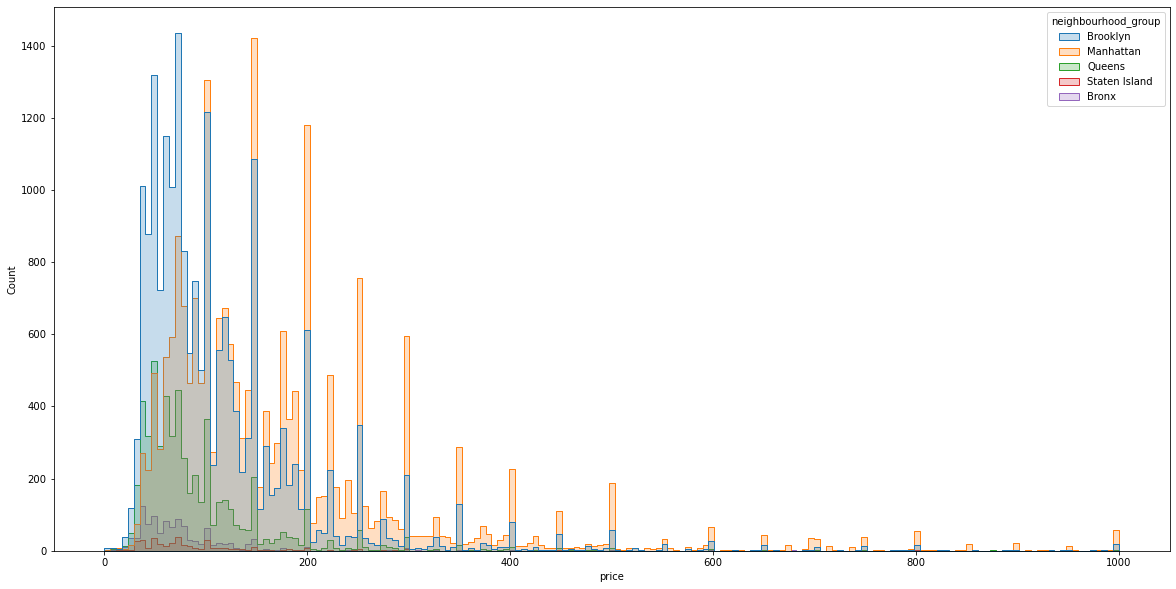

In [26]:
import matplotlib.pyplot as plt
fig, ax = plt.subplots(figsize=(20, 10))
sns.histplot(data=data[data['price']<=1000], x="price",hue="neighbourhood_group",element="step",ax=ax)

C:\Users\risha\AppData\Local\Packages\PythonSoftwareFoundation.Python.3.8_qbz5n2kfra8p0\LocalCache\local-packages\Python38\site-packages\pandas\core\computation\expressions.py:177: UserWarning: evaluating in Python space because the '+' operator is not supported by numexpr for the bool dtype, use '|' instead
  warnings.warn(
C:\Users\risha\AppData\Local\Packages\PythonSoftwareFoundation.Python.3.8_qbz5n2kfra8p0\LocalCache\local-packages\Python38\site-packages\pandas\core\computation\expressions.py:177: UserWarning: evaluating in Python space because the '*' operator is not supported by numexpr for the bool dtype, use '&' instead
  warnings.warn(


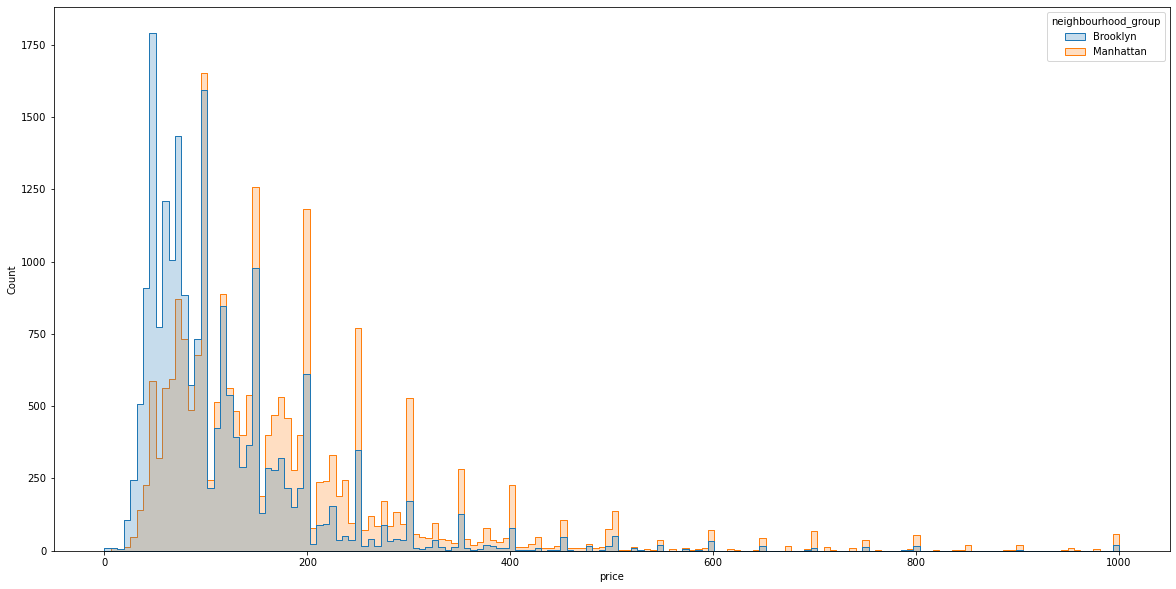

In [35]:
fig, ax = plt.subplots(figsize=(20, 10))
cond1 = data['price']<=1000
cond2 =data['neighbourhood_group']=='Brooklyn' 
cond3 =data['neighbourhood_group']=='Manhattan'
cond = cond2 + cond3
cond = cond * cond1
sns.histplot(data= data[cond ], x="price",hue="neighbourhood_group",element="step",ax=ax)

C:\Users\risha\AppData\Local\Packages\PythonSoftwareFoundation.Python.3.8_qbz5n2kfra8p0\LocalCache\local-packages\Python38\site-packages\pandas\core\computation\expressions.py:177: UserWarning: evaluating in Python space because the '+' operator is not supported by numexpr for the bool dtype, use '|' instead
  warnings.warn(


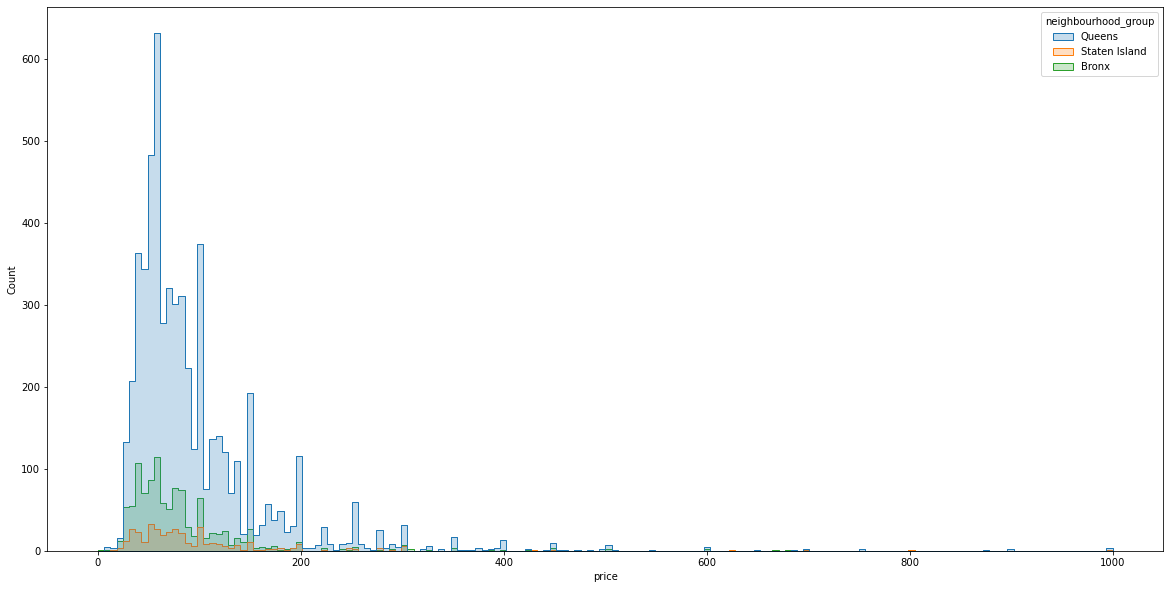

In [44]:
fig, ax = plt.subplots(figsize=(20, 10))
cond1 = data['price']<=1000
cond2 =data['neighbourhood_group']=='Queens' 
cond3 =data['neighbourhood_group']=='Staten Island' 
cond4 =data['neighbourhood_group']=='Bronx'
cond = (cond2+cond3+cond4) & cond1
sns.histplot(data= data[cond ], x="price",hue="neighbourhood_group",element="step",ax=ax)

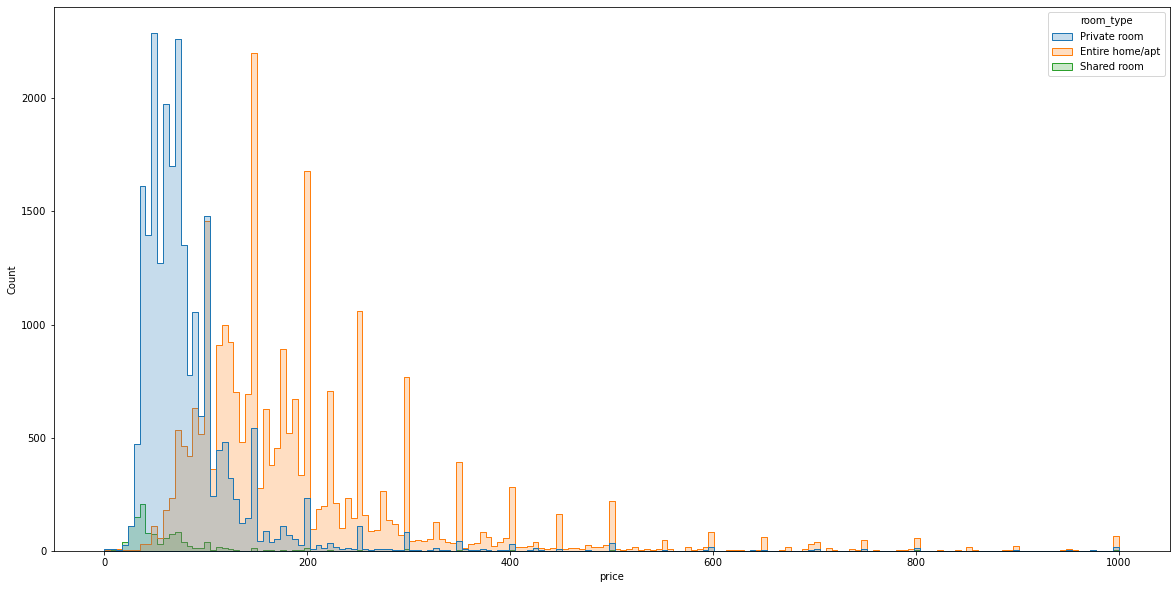

In [47]:
fig, ax = plt.subplots(figsize=(20, 10))
cond1 = data['price']<=1000
sns.histplot(data= data[cond1], x="price",hue="room_type",element="step",ax=ax)

In [37]:
data['neighbourhood_group'].unique()

array(['Brooklyn', 'Manhattan', 'Queens', 'Staten Island', 'Bronx'],
      dtype=object)

In [48]:
newdata = data[data['price']<=500]

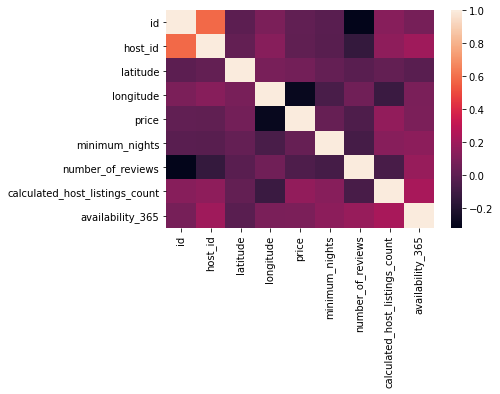

In [49]:
corrmat = newdata.corr()
sns.heatmap(corrmat)

In [51]:
newdata.columns

Index(['id', 'name', 'host_id', 'neighbourhood_group', 'neighbourhood',
       'latitude', 'longitude', 'room_type', 'price', 'minimum_nights',
       'number_of_reviews', 'calculated_host_listings_count',
       'availability_365'],
      dtype='object')

In [54]:
newdata.describe()

,id,host_id,latitude,longitude,price,minimum_nights,number_of_reviews,calculated_host_listings_count,availability_365
count,4.785100e+04,4.785100e+04,47851.000000,47851.000000,47851.000000,47851.000000,47851.000000,47851.000000,47851.000000
mean,1.898151e+07,6.716261e+07,40.728815,-73.951657,131.530564,6.981547,23.546613,7.076487,111.206767
std,1.096475e+07,7.828958e+07,0.054775,0.046241,88.063220,20.386368,44.821004,32.759608,130.976999
min,2.539000e+03,2.438000e+03,40.499790,-74.244420,0.000000,1.000000,0.000000,1.000000,0.000000
25%,9.461212e+06,7.766972e+06,40.689830,-73.982670,68.000000,1.000000,1.000000,1.000000,0.000000
50%,1.962335e+07,3.058512e+07,40.722630,-73.955210,100.000000,2.000000,5.000000,1.000000,43.000000
75%,2.907369e+07,1.072681e+08,40.763250,-73.935585,172.000000,5.000000,24.000000,2.000000,221.000000
max,3.648724e+07,2.743213e+08,40.913060,-73.712990,500.000000,1250.000000,629.000000,327.000000,365.000000


In [55]:
feature_columns=['neighbourhood_group','room_type','price','calculated_host_listings_count','number_of_reviews']

In [57]:
df =newdata[feature_columns]
df.head()

,neighbourhood_group,room_type,price,calculated_host_listings_count,number_of_reviews
0,Brooklyn,Private room,149,6,9
1,Manhattan,Entire home/apt,225,2,45
2,Manhattan,Private room,150,1,0
3,Brooklyn,Entire home/apt,89,1,270
4,Manhattan,Entire home/apt,80,1,9


In [58]:
df.describe()

,price,calculated_host_listings_count,number_of_reviews
count,47851.000000,47851.000000,47851.000000
mean,131.530564,7.076487,23.546613
std,88.063220,32.759608,44.821004
min,0.000000,1.000000,0.000000
25%,68.000000,1.000000,1.000000
50%,100.000000,1.000000,5.000000
75%,172.000000,2.000000,24.000000
max,500.000000,327.000000,629.000000


In [59]:
from sklearn import preprocessing 
  
# label_encoder object knows how to understand word labels. 
label_encoder_neighbourhood_group = preprocessing.LabelEncoder() 
  
# Encode labels in column 'species'. 
df['neighbourhood_group']= label_encoder_neighbourhood_group.fit_transform(df['neighbourhood_group']) 
  
df['neighbourhood_group'].unique() 

<ipython-input-59-830fa856019f>:7: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  df['neighbourhood_group']= label_encoder_neighbourhood_group.fit_transform(df['neighbourhood_group'])


array([1, 2, 3, 4, 0])

In [60]:
label_encoderroom_type = preprocessing.LabelEncoder() 
  
# Encode labels in column 'species'. 
df['room_type']= label_encoderroom_type.fit_transform(df['room_type']) 
  
df['room_type'].unique() 

<ipython-input-60-250b4a27f23f>:4: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  df['room_type']= label_encoderroom_type.fit_transform(df['room_type'])


array([1, 0, 2])

In [61]:
df.dtypes

neighbourhood_group               int32
room_type                         int32
price                             int64
calculated_host_listings_count    int64
number_of_reviews                 int64
dtype: object

In [99]:
from sklearn.preprocessing import StandardScaler
ss = StandardScaler()
dfss = ss.fit_transform(df.drop(["price"],axis=1))


In [100]:
dfss = pd.DataFrame(data=dfss,columns = ['neighbourhood_group','room_type','calculated_host_listings_count','number_of_reviews'])


In [101]:
dfss.describe()


,neighbourhood_group,room_type,calculated_host_listings_count,number_of_reviews
count,4.785100e+04,4.785100e+04,4.785100e+04,4.785100e+04
mean,3.801361e-17,4.751702e-17,4.751702e-18,3.801361e-17
std,1.000010e+00,1.000010e+00,1.000010e+00,1.000010e+00
min,-2.260978e+00,-9.374063e-01,-1.854891e-01,-5.253532e-01
25%,-9.091091e-01,-9.374063e-01,-1.854891e-01,-5.030420e-01
50%,4.427595e-01,-9.374063e-01,-1.854891e-01,-4.137972e-01
75%,4.427595e-01,8.944158e-01,-1.549634e-01,1.011560e-02
max,3.146497e+00,2.726238e+00,9.765894e+00,1.350839e+01


In [102]:
from sklearn.model_selection import train_test_split
X_train, X_test, y_train, y_test = train_test_split(dfss, df['price'], test_size = 0.2, random_state = 0)

In [143]:
from sklearn.tree import DecisionTreeRegressor
regressor = DecisionTreeRegressor(random_state = 0)
regressor.fit(X_train, y_train)


DecisionTreeRegressor(random_state=0)

In [144]:
regressor.score(X_test,y_test)

0.36234322866504465

In [145]:
pred_train= regressor.predict(X_train)
print(np.sqrt(mean_squared_error(y_train,pred_train)))

pred= regressor.predict(X_test)
print(np.sqrt(mean_squared_error(y_test,pred)))

63.969311827592186
70.43116260587257


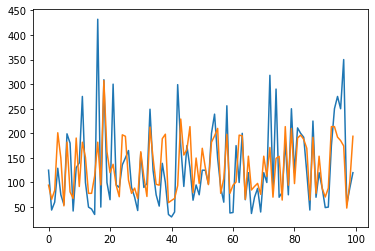

In [146]:
plt.plot(y_test.reset_index()['price'][:100])
plt.plot(regressor.predict(X_test[:100]))

In [147]:
from sklearn.svm import SVR
regressor = SVR(kernel = 'rbf')
regressor.fit(X_train, y_train)

SVR()

In [148]:
regressor.score(X_test,y_test)

0.35652207808932845

In [149]:
pred_train= regressor.predict(X_train)
print(np.sqrt(mean_squared_error(y_train,pred_train)))

pred= regressor.predict(X_test)
print(np.sqrt(mean_squared_error(y_test,pred)))

71.0726350996983
70.75191427841517


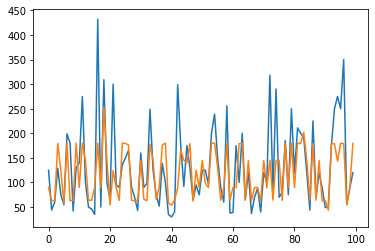

In [150]:
plt.plot(y_test.reset_index()['price'][:100])
plt.plot(regressor.predict(X_test[:100]))

In [139]:
from sklearn.ensemble import RandomForestRegressor
regressor = RandomForestRegressor(n_estimators = 10, random_state = 0)
regressor.fit(X_train, y_train)

RandomForestRegressor(n_estimators=10, random_state=0)

In [140]:
regressor.score(X_test,y_test)

0.3797417017080752

In [141]:
pred_train= regressor.predict(X_train)
print(np.sqrt(mean_squared_error(y_train,pred_train)))

pred= regressor.predict(X_test)
print(np.sqrt(mean_squared_error(y_test,pred)))

64.5295929845343
69.4636598023663


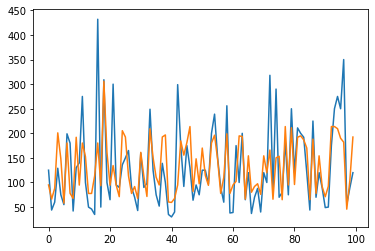

In [142]:
plt.plot(y_test.reset_index()['price'][:100])
plt.plot(regressor.predict(X_test[:100]))

In [151]:
import tensorflow as tf
ann = tf.keras.models.Sequential()
ann.add(tf.keras.layers.Dense(units=128,input_shape = (4,),activation='relu'))
ann.add(tf.keras.layers.Dense(units=128, activation='relu'))
ann.add(tf.keras.layers.Dense(units=1, activation='relu'))
ann.compile(optimizer ="adam", loss = 'mse', metrics = ['mean_absolute_error'])

In [153]:
history = ann.fit(X_train, y_train,validation_data=(X_test,y_test), batch_size = 12, epochs = 10)

Epoch 1/10
3190/3190 [==============================] - 3s 798us/step - loss: 5768.6313 - mean_absolute_error: 51.5996 - val_loss: 4794.6274 - val_mean_absolute_error: 46.9730
Epoch 2/10
3190/3190 [==============================] - 2s 766us/step - loss: 4857.5615 - mean_absolute_error: 47.0590 - val_loss: 4751.0850 - val_mean_absolute_error: 47.0810
Epoch 3/10
3190/3190 [==============================] - 3s 943us/step - loss: 4848.3228 - mean_absolute_error: 46.9782 - val_loss: 4768.4155 - val_mean_absolute_error: 48.2952
Epoch 4/10
3190/3190 [==============================] - 4s 1ms/step - loss: 4834.4521 - mean_absolute_error: 46.9168 - val_loss: 4783.9639 - val_mean_absolute_error: 48.6231
Epoch 5/10
3190/3190 [==============================] - 4s 1ms/step - loss: 4836.4551 - mean_absolute_error: 46.8728 - val_loss: 4784.4771 - val_mean_absolute_error: 46.6147
Epoch 6/10
3190/3190 [==============================] - 4s 1ms/step - loss: 4832.6968 - mean_absolute_error: 46.8726 - val_l

In [154]:
from sklearn.metrics import mean_squared_error
from math import sqrt

pred_train= ann.predict(X_train)
print(np.sqrt(mean_squared_error(y_train,pred_train)))

pred= ann.predict(X_test)
print(np.sqrt(mean_squared_error(y_test,pred)))

69.45416037788543
69.06649176068343


In [155]:
history.history


{'loss': [5768.63134765625,
  4857.5615234375,
  4848.32275390625,
  4834.4521484375,
  4836.455078125,
  4832.69677734375,
  4826.16015625,
  4826.7763671875,
  4824.67041015625,
  4823.2451171875],
 'mean_absolute_error': [51.59964370727539,
  47.059024810791016,
  46.978240966796875,
  46.91679763793945,
  46.87276840209961,
  46.872581481933594,
  46.85850143432617,
  46.83186721801758,
  46.859718322753906,
  46.825096130371094],
 'val_loss': [4794.62744140625,
  4751.0849609375,
  4768.41552734375,
  4783.9638671875,
  4784.47705078125,
  4825.17529296875,
  4751.8603515625,
  4729.15869140625,
  4779.03955078125,
  4770.18212890625],
 'val_mean_absolute_error': [46.972999572753906,
  47.080989837646484,
  48.295162200927734,
  48.62309646606445,
  46.61474609375,
  47.3077392578125,
  46.60013198852539,
  47.429161071777344,
  45.595069885253906,
  45.59660339355469]}

In [156]:
score = ann.evaluate(X_test, y_test,) 

print('Test loss:', score[0]) 
print('Test accuracy:', score[1])

300/300 [==============================] - 0s 527us/step - loss: 4770.1797 - mean_absolute_error: 45.5966
Test loss: 4770.1796875
Test accuracy: 45.59657287597656


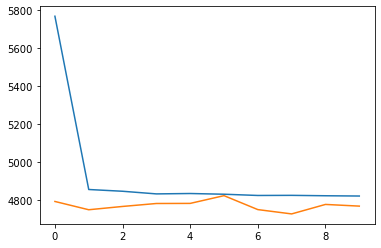

In [157]:
plt.plot(history.history['loss'])
plt.plot(history.history['val_loss'])

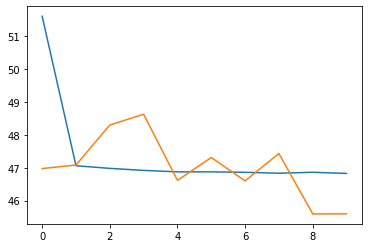

In [158]:
plt.plot(history.history['mean_absolute_error'])
plt.plot(history.history['val_mean_absolute_error'])

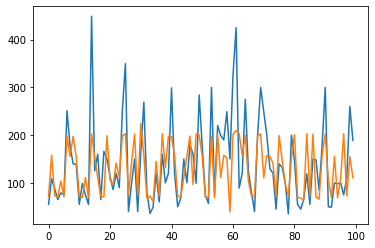

In [132]:
plt.plot(y_train.reset_index()['price'][:100])
plt.plot(ann.predict(X_train[:100]))

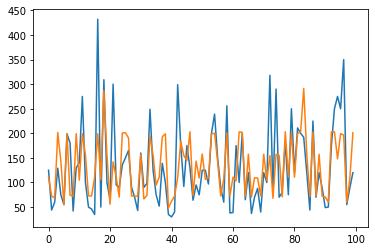

In [134]:
plt.plot(y_test.reset_index()['price'][:100])
plt.plot(ann.predict(X_test[:100]))